In [144]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D # Creating 3D plots
from sklearn.feature_selection import RFE # Recursive feature extraction
from sklearn.linear_model import LinearRegression # Linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler # Scaling data
from sklearn import metrics # Calculating accuracy metrics
from sklearn.svm import SVR # Support vector regressor
from sklearn.tree import DecisionTreeRegressor # Decision tree regressor

from sklearn.neural_network import MLPRegressor # Multilayer perceptron

In [145]:
# Import the training dataset
data = pd.read_excel('IntroEngDataScienceFinalProjectTrainingData.xlsx')

In [146]:
print(data.head())
print('--------------------------------------------------------------')
print(data.isnull().sum()) # Check for missing values

   WELL_ID         JOB_DESC_STAGING     PROPPANT_MESH_SIZE  \
0        2   Wolfcamp Day 1 Stage 5                  40/70   
1        2   Wolfcamp Day 2 Stage 7                  40/70   
2        2  Wolfcamp Day 4 Stage 16  Sand, White, 100 mesh   
3        2   Wolfcamp Day 2 Stage 6                  40/70   
4        2   Wolfcamp Day 2 Stage 7  Sand, White, 100 mesh   

  PROPPANT_MESH_DESCRIPTION  PROPPANT_MASS_USED PROPPANT_MASS_UOM  \
0        Sand, White, 40/70                  72       CWT=132 lbs   
1        Sand, White, 40/70                  78               CWT   
2     Sand, White, 100 mesh                  99               CWT   
3        Sand, White, 40/70                  75               CWT   
4     Sand, White, 100 mesh                  77               CWT   

   VOLUME_PUMPED_GALLONS  AVERAGE_STP AVERAGE_STP_UOM  FRACTURE_GRADIENT  \
0                 356493       4393.0             PSI               0.76   
1                 483451       2287.0             PSI       

Basic Statistics and data cleaning.

In [147]:
# show statistics
print(data.describe())

           WELL_ID  PROPPANT_MASS_USED  VOLUME_PUMPED_GALLONS  AVERAGE_STP  \
count  1179.000000         1179.000000            1179.000000  1179.000000   
mean     13.569126          432.751484          128396.463953  4982.507634   
std       7.421526          465.101241           88212.514668   853.011956   
min       2.000000            1.000000             528.000000    76.000000   
25%       7.000000          189.000000           50259.500000  4431.000000   
50%      14.000000          330.000000          100477.000000  4942.000000   
75%      21.000000          538.500000          187370.000000  5497.000000   
max      26.000000         2292.000000          483451.000000  7778.000000   

       FRACTURE_GRADIENT  MD_MIDDLE_PERFORATION    TVD_DEPTH     TOP_DEPTH  \
count        1179.000000            1179.000000  1179.000000   1179.000000   
mean            0.760814           10468.521628  6642.436811  14176.510602   
std             0.019168            2289.698857   727.062446   

In [148]:
# drop rows with missing values
data.dropna(inplace = True,axis = 0 )
# Check for missing values
print(data.isnull().sum())


WELL_ID                      0
JOB_DESC_STAGING             0
PROPPANT_MESH_SIZE           0
PROPPANT_MESH_DESCRIPTION    0
PROPPANT_MASS_USED           0
PROPPANT_MASS_UOM            0
VOLUME_PUMPED_GALLONS        0
AVERAGE_STP                  0
AVERAGE_STP_UOM              0
FRACTURE_GRADIENT            0
FRACTURE_GRADIENT_UOM        0
MD_MIDDLE_PERFORATION        0
MD_MIDDLE_PERFORATION_UOM    0
TVD_DEPTH                    0
TOP_DEPTH                    0
WELL_LATITUDE                0
WELL_LONGITUDE               0
MIN_STP                      0
MIN_STP_UOM                  0
MAX_STP                      0
MAX_STP_UOM                  0
UPPER_PERF                   0
LOWER_PERF                   0
TRUE_VERTICAL_DEPTH          0
WELL_HORZ_LENGTH             0
NET_PROD_DAYS                0
LIQ_CUM_BBLS                 0
GAS_CUM                      0
dtype: int64


In [149]:
print('-----------------------------------------------------------------------------------')
# print a list of column names
print(data.columns.tolist())

-----------------------------------------------------------------------------------
['WELL_ID', 'JOB_DESC_STAGING', 'PROPPANT_MESH_SIZE', 'PROPPANT_MESH_DESCRIPTION', 'PROPPANT_MASS_USED', 'PROPPANT_MASS_UOM', 'VOLUME_PUMPED_GALLONS', 'AVERAGE_STP', 'AVERAGE_STP_UOM', 'FRACTURE_GRADIENT', 'FRACTURE_GRADIENT_UOM', 'MD_MIDDLE_PERFORATION', 'MD_MIDDLE_PERFORATION_UOM', 'TVD_DEPTH', 'TOP_DEPTH', 'WELL_LATITUDE', 'WELL_LONGITUDE', 'MIN_STP', 'MIN_STP_UOM', 'MAX_STP', 'MAX_STP_UOM', 'UPPER_PERF', 'LOWER_PERF', 'TRUE_VERTICAL_DEPTH', 'WELL_HORZ_LENGTH', 'NET_PROD_DAYS', 'LIQ_CUM_BBLS', 'GAS_CUM']


In [150]:
# Remove all text columns from the dataset
data=data.drop(labels=['JOB_DESC_STAGING','PROPPANT_MESH_DESCRIPTION','PROPPANT_MASS_UOM',
          'AVERAGE_STP_UOM','FRACTURE_GRADIENT_UOM','MD_MIDDLE_PERFORATION_UOM','MIN_STP_UOM',
          'MAX_STP_UOM'], axis = 1)

Some visualization before aggregation

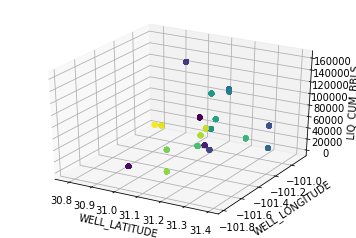

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =data['WELL_LATITUDE']
y =data['WELL_LONGITUDE']
z =data['LIQ_CUM_BBLS']

ax.scatter(x, y, z, c=data['WELL_ID'], marker='o')

ax.set_xlabel('WELL_LATITUDE')
ax.set_ylabel('WELL_LONGITUDE')
ax.set_zlabel('LIQ_CUM_BBLS')
#plt.savefig(fname = '3Dimage')
plt.show()

Aggregate the data by the well ID using the 'groupby' function in pandas

In [152]:
# group the data by the well ID
Grouped_data =data.groupby('WELL_ID', as_index = False)
# sums all the properties by well ID
Grouped_data=Grouped_data.sum()
print(Grouped_data.head())
print('-----------------------------------------------------------------------------------')

   WELL_ID  PROPPANT_MASS_USED  VOLUME_PUMPED_GALLONS  AVERAGE_STP  \
0        2                7103               15727612     279788.0   
1        3              135750                6519843     342126.0   
2        4                6022                9786752     330502.0   
3        6                2346                9280987     389917.5   
4        7               29268                9916132     318670.0   

   FRACTURE_GRADIENT  MD_MIDDLE_PERFORATION  TVD_DEPTH  TOP_DEPTH  \
0              50.16               666938.0     377982     932976   
1              45.60               696122.0     468540     915840   
2              51.00               700620.0     440300     964376   
3              51.00               682175.0     446420     929152   
4              54.00               782251.0     464832    1082520   

   WELL_LATITUDE  WELL_LONGITUDE   MIN_STP  MAX_STP  UPPER_PERF  LOWER_PERF  \
0     2047.64076     -6664.56714  233178.0   427016      405966      924594   
1     

In [153]:
print(Grouped_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 19 columns):
WELL_ID                  20 non-null int64
PROPPANT_MASS_USED       20 non-null int64
VOLUME_PUMPED_GALLONS    20 non-null int64
AVERAGE_STP              20 non-null float64
FRACTURE_GRADIENT        20 non-null float64
MD_MIDDLE_PERFORATION    20 non-null float64
TVD_DEPTH                20 non-null int64
TOP_DEPTH                20 non-null int64
WELL_LATITUDE            20 non-null float64
WELL_LONGITUDE           20 non-null float64
MIN_STP                  20 non-null float64
MAX_STP                  20 non-null int64
UPPER_PERF               20 non-null int64
LOWER_PERF               20 non-null int64
TRUE_VERTICAL_DEPTH      20 non-null int64
WELL_HORZ_LENGTH         20 non-null int64
NET_PROD_DAYS            20 non-null int64
LIQ_CUM_BBLS             20 non-null int64
GAS_CUM                  20 non-null int64
dtypes: float64(6), int64(13)
memory usage: 3.1 KB
None


The entire dataset has been grouped into 20 wells based on the well IDS present. This aggregation was done by summing all the columns per well id. This process is valid for quantities such as Volume of proppant, mass of proppant etc but is meaningless for quantities such as pressure, longitude, fracture gradient etc. In order to solve this, the mean values would be calculated for some other columns instead while the sum would be used for others on a case by case basis.

In [154]:
# The number of rows per well id needs to be computed, 
#this value would then be used to compute the mean value.

The function below was created by Olabode Alamu to count the number of rows that have info for a well id.

In [155]:
"""
This function was created to count the number of rows in the dataset 
which partains to a particular well ID number.
it takes in the dataframe of interest as input, counts the number of rows per well id 
and returns a dataframe with the number of rows per well ID as output
"""
def rowcount(dataframe):
    Unique = dataframe['WELL_ID'].unique() # Checks for the unique well IDs
    length_list = [] 
    # slices through the dataframe till only unique Well ids are found and counted
    for i in Unique:
        length=len(dataframe[dataframe['WELL_ID']== i]) 
        length_list.append(length) # appends the count to the list
    
    # pass into a dataframe
    Count = pd.DataFrame(data= length_list, columns = ['No of rows'])
    Count['Well ID']= Unique
    return Count
   

In [156]:
# the dataframe was passed into the function
Count=rowcount(data)

In [157]:
print(Count)

    No of rows  Well ID
0           66        2
1           60        3
2           68        4
3           68        6
4           72        7
5           52        8
6           51       10
7           65       11
8           61       12
9           70       14
10          76       15
11          66       16
12          54       18
13          38       19
14          60       21
15          58       22
16          35       23
17          64       24
18          44       25
19          44       26


Next we compute the mean value for some of the columns

In [158]:
# Create a column in the Grouped data with the number of rows
Grouped_data['Count'] = Count['No of rows']

In [159]:
print(Grouped_data.head())

   WELL_ID  PROPPANT_MASS_USED  VOLUME_PUMPED_GALLONS  AVERAGE_STP  \
0        2                7103               15727612     279788.0   
1        3              135750                6519843     342126.0   
2        4                6022                9786752     330502.0   
3        6                2346                9280987     389917.5   
4        7               29268                9916132     318670.0   

   FRACTURE_GRADIENT  MD_MIDDLE_PERFORATION  TVD_DEPTH  TOP_DEPTH  \
0              50.16               666938.0     377982     932976   
1              45.60               696122.0     468540     915840   
2              51.00               700620.0     440300     964376   
3              51.00               682175.0     446420     929152   
4              54.00               782251.0     464832    1082520   

   WELL_LATITUDE  WELL_LONGITUDE   MIN_STP  MAX_STP  UPPER_PERF  LOWER_PERF  \
0     2047.64076     -6664.56714  233178.0   427016      405966      924594   
1     

The count column would then be used to compute the mean values for ['GAS_CUM','LIQ_CUM_BBLS','NET_PROD_DAYS','WELL_HORZ_LENGTH',
'TRUE_VERTICAL_DEPTH','LOWER_PERF','UPPER_PERF','MAX_STP',
'MIN_STP','WELL_LONGITUDE','WELL_LATITUDE',
 'TOP_DEPTH','TVD_DEPTH','MD_MIDDLE_PERFORATION',
 'FRACTURE_GRADIENT','AVERAGE_STP']

In [160]:
# This would be achieved using a custom function

In [161]:
def mean_calculator(dataframe,new_column_names,old_column_names):
    """
    This function takes in a dataframe and creates new columns based 
    on the calculated mean of the previous columns. it requires a list of the new column names and
    a list of the old column names which require a mean to be computed.
    """
    
    for i,j in zip(new_column_names,old_column_names):
        dataframe[i]= dataframe[j]/dataframe['Count']

In [162]:
# list of columns which the mean to be computed
old_column_names = ['GAS_CUM','LIQ_CUM_BBLS','NET_PROD_DAYS','WELL_HORZ_LENGTH','TRUE_VERTICAL_DEPTH'
                   ,'LOWER_PERF','UPPER_PERF','MAX_STP','MIN_STP','WELL_LONGITUDE','WELL_LATITUDE',
                   'TOP_DEPTH','TVD_DEPTH','MD_MIDDLE_PERFORATION','FRACTURE_GRADIENT','AVERAGE_STP']

In [163]:
# new column names that would be created on the dataframe
new_column_names=['Mean Gas_cum','Mean Liquid produced','Mean Production days','Mean Horizontal length',
 'Mean True Vertical Distance','Mean Lower perforation','Mean Upper perforation','Mean Maximum STP',
'Mean Minimum STP','Longitude','Latitude','Mean TOP Depth','Mean TVD depth','Mean Mid perforation',
 'Mean Fracture Gradient','Mean STP']

In [164]:
# call the mean calculator custom function
mean_calculator(dataframe=Grouped_data,
                new_column_names=new_column_names,old_column_names=old_column_names)

In [165]:
print(Grouped_data.head())

   WELL_ID  PROPPANT_MASS_USED  VOLUME_PUMPED_GALLONS  AVERAGE_STP  \
0        2                7103               15727612     279788.0   
1        3              135750                6519843     342126.0   
2        4                6022                9786752     330502.0   
3        6                2346                9280987     389917.5   
4        7               29268                9916132     318670.0   

   FRACTURE_GRADIENT  MD_MIDDLE_PERFORATION  TVD_DEPTH  TOP_DEPTH  \
0              50.16               666938.0     377982     932976   
1              45.60               696122.0     468540     915840   
2              51.00               700620.0     440300     964376   
3              51.00               682175.0     446420     929152   
4              54.00               782251.0     464832    1082520   

   WELL_LATITUDE  WELL_LONGITUDE     ...       Mean Upper perforation  \
0     2047.64076     -6664.56714     ...                       6151.0   
1     1862.19480  

In [166]:
# Create list of columns that were the sum of properties, remove them and replace with the mean property
remove_columns = ['AVERAGE_STP','FRACTURE_GRADIENT','MD_MIDDLE_PERFORATION','TVD_DEPTH',
                 'TOP_DEPTH','WELL_LATITUDE','WELL_LONGITUDE','MIN_STP','MAX_STP','UPPER_PERF',
                 'LOWER_PERF','TRUE_VERTICAL_DEPTH','WELL_HORZ_LENGTH','NET_PROD_DAYS','LIQ_CUM_BBLS'
                 ,'GAS_CUM']

# Drop some more columns
Grouped_data=Grouped_data.drop(labels=remove_columns, axis = 1)
    

In [167]:
print(Grouped_data.head())

   WELL_ID  PROPPANT_MASS_USED  VOLUME_PUMPED_GALLONS  Count  Mean Gas_cum  \
0        2                7103               15727612     66      320872.0   
1        3              135750                6519843     60       17453.0   
2        4                6022                9786752     68      150155.0   
3        6                2346                9280987     68      580507.0   
4        7               29268                9916132     72      104665.0   

   Mean Liquid produced  Mean Production days  Mean Horizontal length  \
0               41307.0                 670.0                 14136.0   
1               31108.0                 608.0                 15264.0   
2               15100.0                1522.0                  7707.0   
3              160458.0                 731.0                  7100.0   
4                2039.0                1400.0                  8579.0   

   Mean True Vertical Distance  Mean Lower perforation  \
0                       6888.0    

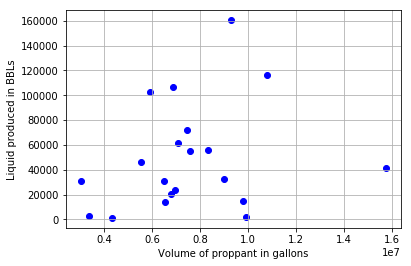

In [168]:
plt.scatter(x= Grouped_data['VOLUME_PUMPED_GALLONS'], y = Grouped_data['Mean Liquid produced'],c='b')
plt.ylabel('Liquid produced in BBLs')
plt.xlabel('Volume of proppant in gallons')
plt.grid()
plt.show()

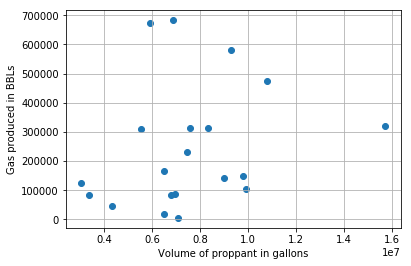

In [169]:
plt.scatter(x= Grouped_data['VOLUME_PUMPED_GALLONS'], y = Grouped_data['Mean Gas_cum'])
plt.ylabel('Gas produced in BBLs')
plt.xlabel('Volume of proppant in gallons')
plt.grid()
plt.show()

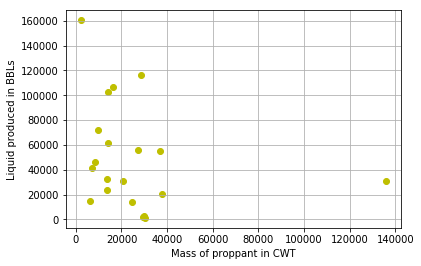

In [170]:
plt.scatter(x= Grouped_data['PROPPANT_MASS_USED'], y = Grouped_data['Mean Liquid produced'], c='y')
plt.ylabel('Liquid produced in BBLs')
plt.xlabel('Mass of proppant in CWT')
plt.grid()
plt.show()

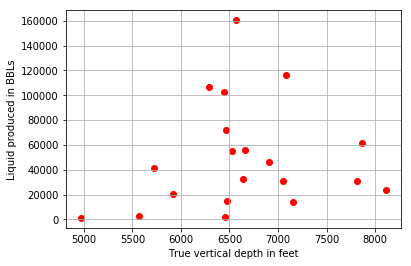

In [171]:
plt.scatter(x= Grouped_data['Mean TVD depth'], y = Grouped_data['Mean Liquid produced'], c = 'r')
plt.ylabel('Liquid produced in BBLs')
plt.xlabel('True vertical depth in feet')
plt.grid()
plt.show()

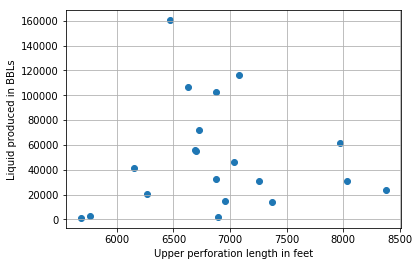

In [172]:
plt.scatter(x= Grouped_data['Mean Upper perforation'], y = Grouped_data['Mean Liquid produced'])
plt.ylabel('Liquid produced in BBLs')
plt.xlabel('Upper perforation length in feet')
plt.grid()
plt.show()

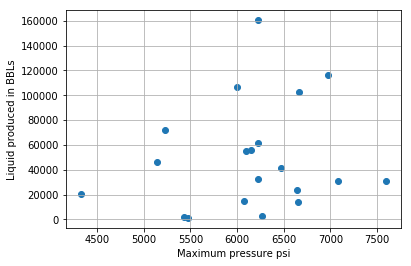

In [173]:
plt.scatter(x= Grouped_data['Mean Maximum STP'], y = Grouped_data['Mean Liquid produced'])
plt.ylabel('Liquid produced in BBLs')
plt.xlabel('Maximum pressure psi')
plt.grid()
plt.show()

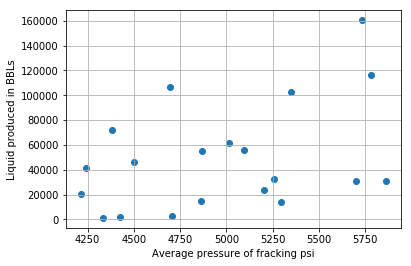

In [174]:
plt.scatter(x= Grouped_data['Mean STP'], y = Grouped_data['Mean Liquid produced'])
plt.ylabel('Liquid produced in BBLs')
plt.xlabel('Average pressure of fracking psi')
plt.grid()
plt.show()

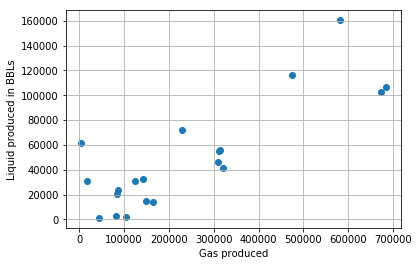

In [175]:
plt.scatter(x= Grouped_data['Mean Gas_cum'], y = Grouped_data['Mean Liquid produced'])
plt.ylabel('Liquid produced in BBLs')
plt.xlabel('Gas produced')
plt.grid()
plt.show()

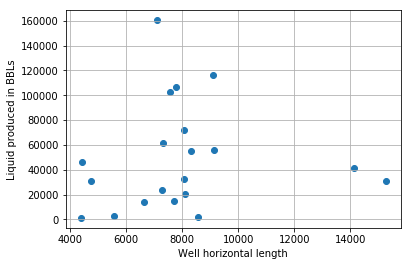

In [176]:
plt.scatter(x= Grouped_data['Mean Horizontal length'], y = Grouped_data['Mean Liquid produced'])
plt.ylabel('Liquid produced in BBLs')
plt.xlabel('Well horizontal length')
plt.grid()
plt.show()

The dataframe is in the required format, we can continue with the analysis.

The exported lat and long data would be used to create the basin location map

In [177]:
#Export the longitude and latitude data
long_lat =Grouped_data[['WELL_ID','Latitude','Longitude', 
                        'Mean Liquid produced','Mean Production days']]
# export to a csv
long_lat.to_csv('long_lat.csv')

In [178]:
# Create target variable
y = Grouped_data['Mean Liquid produced']

# These features are dropped because they are repetitve
dropoff = ['Mean Gas_cum','Count','WELL_ID','Latitude','Longitude',
           'Mean Liquid produced','Mean True Vertical Distance']

# Create input features
X=Grouped_data.drop(labels=dropoff, axis = 1)

Feature selection was perfromed using the recursive feature extraction model in scikit learn

The recursive feature extraction model requires an estimator, in this case, the linear regression model was chosen as the estimator since the objective of this project is that of a regression problem.

In [179]:
lm = LinearRegression()
# SPlit the data into training and test data

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X,y, test_size = 0.3)
# create the RFE model and select 12 attributes out of 13 possible
rfe = RFE(estimator = lm, n_features_to_select=12, verbose=3)
rfe = rfe.fit(X_train_rfe, y_train_rfe)
# summarize the selection of the attributes
print(rfe.support_) # the parameters with True are selected
print('----------------------------------------------------------------')
print(rfe.ranking_)

Fitting estimator with 13 features.
[ True False  True  True  True  True  True  True  True  True  True  True
  True]
----------------------------------------------------------------
[1 2 1 1 1 1 1 1 1 1 1 1 1]


Display the selected features

In [180]:
# display important features
print(X.columns[rfe.support_])

Index(['PROPPANT_MASS_USED', 'Mean Production days', 'Mean Horizontal length',
       'Mean Lower perforation', 'Mean Upper perforation', 'Mean Maximum STP',
       'Mean Minimum STP', 'Mean TOP Depth', 'Mean TVD depth',
       'Mean Mid perforation', 'Mean Fracture Gradient', 'Mean STP'],
      dtype='object')


The selected features are ['PROPPANT_MASS_USED', 'Mean Production days', 'Mean Horizontal length',
       'Mean Lower perforation', 'Mean Upper perforation', 'Mean Maximum STP',
       'Mean Minimum STP', 'Mean TOP Depth', 'Mean TVD depth',
       'Mean Mid perforation', 'Mean Fracture Gradient', 'Mean STP']

The 'VOLUME_PUMPED_GALLONS' was dropped since it is the least important feature acording to the analysis.

In [181]:
# The top 12 important features were selected
# They would be used to form the new X matrix
X = X[['PROPPANT_MASS_USED', 'Mean STP', 'Mean Fracture Gradient',
       'Mean Mid perforation', 'Mean TVD depth', 'Mean TOP Depth',
       'Mean Minimum STP', 'Mean Maximum STP', 'Mean Upper perforation',
       'Mean Lower perforation', 'Mean Horizontal length',
       'Mean Production days']]

Prepare the X matrix by Standardizing it.

In [182]:
# Standardize the data

Scaled = StandardScaler()
Scaled.fit(X)
Scaled.transform(X)

array([[ -6.65735159e-01,  -1.40243760e+00,  -2.45514308e-02,
         -2.39941981e-01,  -1.20709006e+00,   1.17346359e-01,
         -2.86831615e-01,   4.41713888e-01,  -1.09417273e+00,
          1.30328633e-01,   2.33665043e+00,  -5.49961765e-01],
       [  4.03865482e+00,   1.38202616e+00,  -2.45514308e-02,
          1.19628562e+00,   1.56421887e+00,   7.87896983e-01,
         -4.80285977e-01,   1.28504958e+00,   1.68937900e+00,
          8.05834784e-01,   2.76370558e+00,  -7.71590815e-01],
       [ -7.05265389e-01,  -2.20212884e-01,  -5.15580047e-01,
         -4.98594043e-02,  -2.11442087e-01,   1.44691509e-01,
          1.01803221e-01,  -1.02050245e-01,   1.02162271e-01,
          1.74995253e-01,  -9.73367722e-02,   2.49565035e+00],
       [ -8.39690114e-01,   1.44289864e+00,  -5.15580047e-01,
         -3.10112984e-01,  -9.16448704e-02,  -1.63238654e-01,
          2.22829409e+00,   1.04468355e-01,  -6.21857302e-01,
         -1.49296649e-01,  -3.27143932e-01,  -3.31907376e-01],
    

In [183]:
# SPlit the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

Regression analysis

In [184]:
lm = LinearRegression() # linear regression

DTR = DecisionTreeRegressor(max_depth=1) # Decision tree regressor
MLPR = MLPRegressor(max_iter = 200, solver = 'lbfgs', verbose=True, tol = 0.000001) # Multilayer perceptron

In [185]:
SVR = SVR(C = 0.0001, epsilon = 0.2,kernel = 'linear') # Support vector regression

In [186]:
def Regression_analysis(Regressor,X_train,y_train,X_test,y_test):
    Regressor.fit(X_train,y_train)
    Predict = Regressor.predict(X_test)
    plt.scatter(y_test,Predict)
    plt.xlabel('Y test values')
    plt.ylabel('Predicted values')
    plt.grid()
    plt.show()
    print('MAE:', metrics.mean_absolute_error(y_test, Predict))
    print('MSE:', metrics.mean_squared_error(y_test, Predict))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predict)))

Linear regression

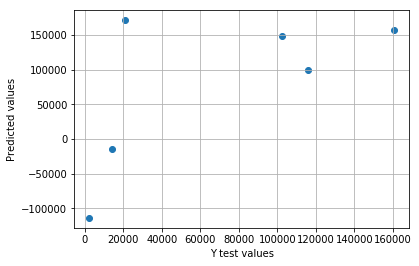

MAE: 60307.8769227
MSE: 6557027948.81
RMSE: 80975.4774534


In [187]:
Regression_analysis(lm,X_train,y_train,X_test,y_test)

Support Vector Regression

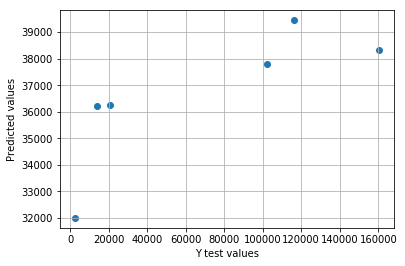

MAE: 55086.9794394
MSE: 4429221587.65
RMSE: 66552.3973096


In [188]:
Regression_analysis(SVR,X_train,y_train,X_test,y_test)

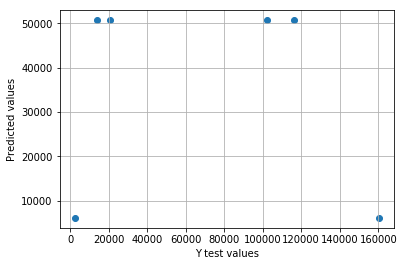

MAE: 56939.0
MSE: 5503521880.7
RMSE: 74185.7255859


In [189]:
Regression_analysis(DTR,X_train,y_train,X_test,y_test)

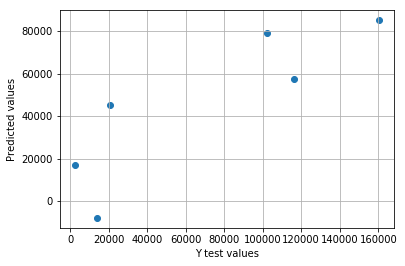

MAE: 36307.7778453
MSE: 1822337212.23
RMSE: 42688.8417767


In [190]:
Regression_analysis(MLPR,X_train,y_train,X_test,y_test)

Import test model datasheet

In [125]:
test_data = pd.read_excel('IntroEngDataScienceFinalProjectTestModelOutput.xlsx')
print(test_data.head())
print(test_data.isnull().sum())

   WELL_ID          JOB_DESC_STAGING     PROPPANT_MESH_SIZE  \
0        1  Day 3 Stage 11: Wolfcamp  Sand, White, 100 mesh   
1        1   Day 2 Stage 9: Wolfcamp  Sand, White, 100 mesh   
2        1   Day 1 Stage 4: Wolfcamp                  40/70   
3        1   Day 2 Stage 7: Wolfcamp                  40/70   
4        1   Day 2 Stage 9: Wolfcamp                  40/70   

  PROPPANT_MESH_DESCRIPTION  PROPPANT_MASS_USED PROPPANT_MASS_UOM  \
0     Sand, White, 100 mesh                  85     CWT = 132 lbs   
1     Sand, White, 100 mesh                 109               CWT   
2        Sand, White, 40/70                  70               CWT   
3        Sand, White, 40/70                 102               CWT   
4        Sand, White, 40/70                 110               CWT   

   VOLUME_PUMPED_GALLONS  AVERAGE_STP AVERAGE_STP_UOM  FRACTURE_GRADIENT  \
0                 127232         4171             PSI               0.76   
1                 126245         4606             PSI 

In [126]:

test_data=test_data.drop(labels=['JOB_DESC_STAGING','PROPPANT_MESH_DESCRIPTION','PROPPANT_MASS_UOM',
          'AVERAGE_STP_UOM','FRACTURE_GRADIENT_UOM','MD_MIDDLE_PERFORATION_UOM','MIN_STP_UOM',
          'MAX_STP_UOM'], axis = 1)

In [127]:
# Count the number of rows
Count = rowcount(test_data)

In [128]:
print(Count)

   No of rows  Well ID
0          66        1
1           3        5
2          50        9
3          58       13
4          67       17
5          34       20
6          60       27


In [129]:
# group the data by the well ID
test_group =test_data.groupby('WELL_ID', as_index = False)
test_group=test_group.sum()
test_group['Count'] = Count['No of rows']
print(test_group.head())

   WELL_ID  PROPPANT_MASS_USED  VOLUME_PUMPED_GALLONS  AVERAGE_STP  \
0        1                7219               14805348       297180   
1        5                 618                 257683        17916   
2        9                8868                8099427       278880   
3       13               12287                6002579       251602   
4       17               37775                7274959       351314   

   FRACTURE_GRADIENT  MD_MIDDLE_PERFORATION  TVD_DEPTH  TOP_DEPTH  \
0              50.16               672484.0     377718     934230   
1               2.25                41838.0      19749      43671   
2              40.00               535220.0     332650     725100   
3              44.08               596267.0     362500     800168   
4              50.92               726750.0     437644     999506   

   WELL_LATITUDE  WELL_LONGITUDE  MIN_STP  MAX_STP  UPPER_PERF  LOWER_PERF  \
0     2046.01650     -6664.53810   230044   466374      413160      927960   
1       

In [130]:
old_column_names = ['NET_PROD_DAYS','WELL_HORZ_LENGTH','TRUE_VERTICAL_DEPTH'
                   ,'LOWER_PERF','UPPER_PERF','MAX_STP','MIN_STP','WELL_LONGITUDE','WELL_LATITUDE',
                   'TOP_DEPTH','TVD_DEPTH','MD_MIDDLE_PERFORATION','FRACTURE_GRADIENT','AVERAGE_STP']
# new column names
new_column_names=['Mean Production days','Mean Horizontal length',
 'Mean True Vertical Distance','Mean Lower perforation','Mean Upper perforation','Mean Maximum STP',
'Mean Minimum STP','Longitude','Latitude','Mean TOP Depth','Mean TVD depth','Mean Mid perforation',
 'Mean Fracture Gradient','Mean STP']

In [131]:
# Compute the mean and generate new columns using the predefined columns
mean_calculator(test_group,old_column_names=old_column_names,new_column_names=new_column_names)

In [132]:
# Drop some  columns
test_group=test_group.drop(labels= ['AVERAGE_STP','FRACTURE_GRADIENT','MD_MIDDLE_PERFORATION','TVD_DEPTH',
                 'TOP_DEPTH','WELL_LATITUDE','WELL_LONGITUDE','MIN_STP','MAX_STP','UPPER_PERF',
                 'LOWER_PERF','TRUE_VERTICAL_DEPTH','WELL_HORZ_LENGTH','NET_PROD_DAYS'
                 ], axis = 1)

In [133]:
Xtest=test_group.drop(labels=['Count','WELL_ID','Latitude','Longitude','Mean True Vertical Distance'], axis = 1)

In [134]:
# re-index the column based on the selected features
Xtest = Xtest[['PROPPANT_MASS_USED', 'Mean STP', 'Mean Fracture Gradient',
       'Mean Mid perforation', 'Mean TVD depth', 'Mean TOP Depth',
       'Mean Minimum STP', 'Mean Maximum STP', 'Mean Upper perforation',
       'Mean Lower perforation', 'Mean Horizontal length',
       'Mean Production days','LIQ_CUM_BBLS']]

In [135]:
print(Xtest)

   PROPPANT_MASS_USED     Mean STP  Mean Fracture Gradient  \
0                7219  4502.727273                    0.76   
1                 618  5972.000000                    0.75   
2                8868  5577.600000                    0.80   
3               12287  4337.965517                    0.76   
4               37775  5243.492537                    0.76   
5               18503  5990.323529                    0.76   
6               45934  5743.000000                    0.65   

   Mean Mid perforation  Mean TVD depth  Mean TOP Depth  Mean Minimum STP  \
0          10189.151515          5723.0         14155.0       3485.515152   
1          13946.000000          6583.0         14557.0       5701.000000   
2          10704.400000          6653.0         14502.0       2543.360000   
3          10280.465517          6250.0         13796.0       3081.034483   
4          10847.014925          6532.0         14918.0       3802.417910   
5           9555.088235          7069.0  

In [136]:
# Remove the liq cum column prior to Standardizing
Xtestscale = Xtest[['PROPPANT_MASS_USED', 'Mean STP', 'Mean Fracture Gradient',
       'Mean Mid perforation', 'Mean TVD depth', 'Mean TOP Depth',
       'Mean Minimum STP', 'Mean Maximum STP', 'Mean Upper perforation',
       'Mean Lower perforation', 'Mean Horizontal length',
       'Mean Production days']]

In [137]:
#Standardize
Scaled.fit(Xtestscale)
Scaled.transform(Xtestscale)

array([[-0.73904507, -1.33153288,  0.26637086, -0.63208293, -1.48074612,
         0.08100803, -0.5491714 ,  0.61611551, -1.19404533,  0.06505822,
         0.8021137 , -0.86780205],
       [-1.16235774,  1.01023398,  0.03329636,  2.17012293, -0.15325667,
         0.47403666,  1.53900299, -0.85347351, -0.25124164,  0.55496634,
         0.4985891 ,  2.00669845],
       [-0.63329707,  0.38162852,  1.19866888, -0.24776284, -0.04520521,
         0.42026409, -1.43718662, -0.16335594, -0.19684912,  0.4248499 ,
         0.39386903, -0.11854126],
       [-0.4140415 , -1.59413465,  0.26637086, -0.56397248, -0.66727294,
        -0.26998022, -0.93040902, -1.87626114, -0.46881172, -0.29079053,
         0.11816071, -0.65422771],
       [ 1.22046738, -0.15088104,  0.26637086, -0.14138741, -0.23197988,
         0.82698028, -0.25047912,  0.31933907, -0.49810001,  0.7659127 ,
         0.83565684, -0.76276549],
       [-0.01541834,  1.03943852,  0.26637086, -1.1050261 ,  0.59692923,
        -2.29280666,  

We use the multilayer perceptron to predict the liquid produced column 

In [138]:
Xtest['LIQ_CUM_BBLS'] = MLPR.predict(Xtestscale)

In [139]:
print(Xtest)

   PROPPANT_MASS_USED     Mean STP  Mean Fracture Gradient  \
0                7219  4502.727273                    0.76   
1                 618  5972.000000                    0.75   
2                8868  5577.600000                    0.80   
3               12287  4337.965517                    0.76   
4               37775  5243.492537                    0.76   
5               18503  5990.323529                    0.76   
6               45934  5743.000000                    0.65   

   Mean Mid perforation  Mean TVD depth  Mean TOP Depth  Mean Minimum STP  \
0          10189.151515          5723.0         14155.0       3485.515152   
1          13946.000000          6583.0         14557.0       5701.000000   
2          10704.400000          6653.0         14502.0       2543.360000   
3          10280.465517          6250.0         13796.0       3081.034483   
4          10847.014925          6532.0         14918.0       3802.417910   
5           9555.088235          7069.0  

In [140]:
Xtest['Well ID'] = test_group['WELL_ID']

In [141]:
print(Xtest)

   PROPPANT_MASS_USED     Mean STP  Mean Fracture Gradient  \
0                7219  4502.727273                    0.76   
1                 618  5972.000000                    0.75   
2                8868  5577.600000                    0.80   
3               12287  4337.965517                    0.76   
4               37775  5243.492537                    0.76   
5               18503  5990.323529                    0.76   
6               45934  5743.000000                    0.65   

   Mean Mid perforation  Mean TVD depth  Mean TOP Depth  Mean Minimum STP  \
0          10189.151515          5723.0         14155.0       3485.515152   
1          13946.000000          6583.0         14557.0       5701.000000   
2          10704.400000          6653.0         14502.0       2543.360000   
3          10280.465517          6250.0         13796.0       3081.034483   
4          10847.014925          6532.0         14918.0       3802.417910   
5           9555.088235          7069.0  

In [142]:
Xtest

,PROPPANT_MASS_USED,Mean STP,Mean Fracture Gradient,Mean Mid perforation,Mean TVD depth,Mean TOP Depth,Mean Minimum STP,Mean Maximum STP,Mean Upper perforation,Mean Lower perforation,Mean Horizontal length,Mean Production days,LIQ_CUM_BBLS,Well ID
0,7219,4502.727273,0.76,10189.151515,5723.0,14155.0,3485.515152,7066.272727,6260.0,14060.0,8345.0,670.0,75964.973443,1
1,618,5972.000000,0.75,13946.000000,6583.0,14557.0,5701.000000,6173.000000,6936.0,14557.0,7974.0,1491.0,218326.808322,5
2,8868,5577.600000,0.80,10704.400000,6653.0,14502.0,2543.360000,6592.480000,6975.0,14425.0,7846.0,884.0,29174.453617,9
3,12287,4337.965517,0.76,10280.465517,6250.0,13796.0,3081.034483,5551.310345,6780.0,13699.0,7509.0,731.0,42287.294083,13
4,37775,5243.492537,0.76,10847.014925,6532.0,14918.0,3802.417910,6885.880597,6759.0,14771.0,8386.0,700.0,63675.484749,17
5,18503,5990.323529,0.76,9555.088235,7069.0,11727.0,5008.382353,7532.441176,7410.0,11671.0,4608.0,761.0,35751.015851,20
6,45934,5743.000000,0.65,11733.866667,7966.0,14850.0,4855.466667,7041.033333,8693.0,14775.0,6884.0,1188.0,25599.437312,27


Export the result to a csv file

In [143]:
# export to a csv
Xtest.to_csv('FinalResult.csv')